## Recommendation System - Part I

### Product popularity based recommendation system targeted at new customers

Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

#### Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [59]:
import json
conn = psycopg2.connect(database="sk_final", user = "tanu", password = "1234", host = "127.0.0.1", port = "5432")

if conn:
    print("Opened database successfully")
cur = conn.cursor()

cur.execute("SELECT id, name, specifications, category_id, rating  from product where rating is not NULL")
rows = cur.fetchall()
rowarray_list = {'id':[], 'name':[], 'specifications':[],'category': [],'ratings':[]}
for row in rows:
    rowarray_list["id"].append(row[0])
    rowarray_list["name"].append(row[1])
    rowarray_list["specifications"].append(row[2])
    rowarray_list["category"].append(row[3])
    rowarray_list["ratings"].append(row[4])
data = rowarray_list
product_ratings = pd.DataFrame(data)
print(product_ratings)
product_ratings.head(len(data['id']))

Opened database successfully
        id                                               name specifications  \
0        2  HIM TAX Silicone Push Pop Bubble Fidget Sensor...           None   
1        3  Crafty villa Original POP POP Magic Wrinkle So...           None   
2        5  Mrsanotiyas shock pen and chewing gum Gag Toy ...           None   
3        6  YOTYM Pop Fidget Toys, Rainbow Heart Pop it Up...           None   
4        7  KHG Festival Special Original POP POP Magic Wr...           None   
...    ...                                                ...            ...   
1130  1093  Kebilshop 6.35mm Mono Jack Male To 6.35 mm Mal...           None   
1131  1103  Belear Nylon Ukulele Strings Set Tenor Ukelele...           None   
1132  1112  YAMAHA C40M Matte (Natural) Classical Guitar S...           None   
1133  1123  blueberry 38C Classic Black, 38 Inch Acoustic ...           None   
1134  1132  PENNYCREEK Acoustic 2ndstring+capo+5picks+wall...           None   

      cate

,id,name,specifications,category,ratings
0,2,HIM TAX Silicone Push Pop Bubble Fidget Sensor...,None,1,3.9
1,3,Crafty villa Original POP POP Magic Wrinkle So...,None,1,3.7
2,5,Mrsanotiyas shock pen and chewing gum Gag Toy ...,None,1,3.2
3,6,"YOTYM Pop Fidget Toys, Rainbow Heart Pop it Up...",None,1,3.7
4,7,KHG Festival Special Original POP POP Magic Wr...,None,1,3.2
...,...,...,...,...,...
1130,1093,Kebilshop 6.35mm Mono Jack Male To 6.35 mm Mal...,None,23,3.1
1131,1103,Belear Nylon Ukulele Strings Set Tenor Ukelele...,None,23,3.1
1132,1112,YAMAHA C40M Matte (Natural) Classical Guitar S...,None,23,3.5
1133,1123,"blueberry 38C Classic Black, 38 Inch Acoustic ...",None,23,3.6


In [60]:
product_ratings.shape

(1135, 5)

In [63]:
popular_products = pd.DataFrame(product_ratings.groupby('category')['ratings'].mean())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(100)

,ratings
category,
10,4.104545
11,4.065217
22,3.984211
5,3.918519
6,3.703125
15,3.595238
13,3.580000
21,3.577778
3,3.561538


<AxesSubplot:xlabel='category'>

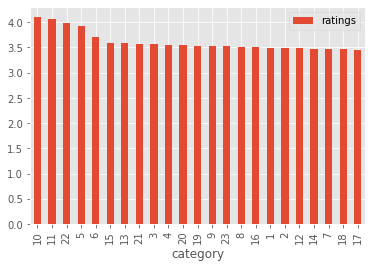

In [64]:
most_popular.head(30).plot(kind = "bar")

##### Analysis:

The above graph gives us the most popular products categories (arranged in descending order) sold by the business.

## Recommendation System - Part II

For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [70]:
# Importing libraries
import psycopg2
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Item to item based recommendation system based on product description

Applicable when business is setting up its E-commerce website for the first time

In [66]:
import json
conn = psycopg2.connect(database="sk_final", user = "tanu", password = "1234", host = "127.0.0.1", port = "5432")

if conn:
    print("Opened database successfully")
cur = conn.cursor()

cur.execute("SELECT id, name, specifications  from product")
rows = cur.fetchall()
rowarray_list = {'id':[], 'name':[], 'specifications':[]}
for row in rows:
    rowarray_list["id"] .append(row[0])
    rowarray_list["name"] .append(row[1])
    rowarray_list["specifications"] .append(row[1])

# data = json.dumps(rowarray_list)
data = rowarray_list
product_descriptions = pd.DataFrame(data)
product_descriptions.shape

Opened database successfully


(1135, 3)

#### Checking for missing values

In [67]:

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,id,name,specifications
0,2,HIM TAX Silicone Push Pop Bubble Fidget Sensor...,HIM TAX Silicone Push Pop Bubble Fidget Sensor...
1,3,Crafty villa Original POP POP Magic Wrinkle So...,Crafty villa Original POP POP Magic Wrinkle So...
2,5,Mrsanotiyas shock pen and chewing gum Gag Toy ...,Mrsanotiyas shock pen and chewing gum Gag Toy ...
3,6,"YOTYM Pop Fidget Toys, Rainbow Heart Pop it Up...","YOTYM Pop Fidget Toys, Rainbow Heart Pop it Up..."
4,7,KHG Festival Special Original POP POP Magic Wr...,KHG Festival Special Original POP POP Magic Wr...


In [68]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]
print(product_descriptions1)
product_descriptions1["name"].head(10)

      id                                               name  \
0      2  HIM TAX Silicone Push Pop Bubble Fidget Sensor...   
1      3  Crafty villa Original POP POP Magic Wrinkle So...   
2      5  Mrsanotiyas shock pen and chewing gum Gag Toy ...   
3      6  YOTYM Pop Fidget Toys, Rainbow Heart Pop it Up...   
4      7  KHG Festival Special Original POP POP Magic Wr...   
..   ...                                                ...   
495  551                 Prestige Atlas 1.8 Electric Kettle   
496  552  Butterfly Rapid Kettle 1.5 Litre + Eco 750 Ml ...   
497  553  Butterfly Rapid Kettle 1.5 Litre + Eco 750 Ml ...   
498  554  Butterfly Rapid Kettle 1.5 Litre + Eco 750 Ml ...   
499  555                      Bajaj GX1 500 W Mixer Grinder   

                                        specifications  
0    HIM TAX Silicone Push Pop Bubble Fidget Sensor...  
1    Crafty villa Original POP POP Magic Wrinkle So...  
2    Mrsanotiyas shock pen and chewing gum Gag Toy ...  
3    YOTYM Pop 

0    HIM TAX Silicone Push Pop Bubble Fidget Sensor...
1    Crafty villa Original POP POP Magic Wrinkle So...
2    Mrsanotiyas shock pen and chewing gum Gag Toy ...
3    YOTYM Pop Fidget Toys, Rainbow Heart Pop it Up...
4    KHG Festival Special Original POP POP Magic Wr...
5    IndusBay 22 Inches PUBG M4 M416 BB Bullet Toy ...
6    coolcold Pop It Fidget Toys, Push Pop Bubble F...
7    WHEELSQUARE BB bulue gun for kids with 100 bb ...
8    INDOVSION POPit Fidget Toys,Push Pop Bubble Fi...
9    Galactic Bubble Machine Bubbles for Kids Cool ...
Name: name, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [71]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["name"])
X1

<500x1324 sparse matrix of type '<class 'numpy.float64'>'
	with 3483 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

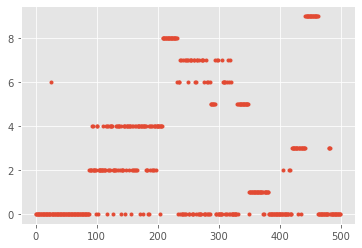

In [72]:

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


#### Top words in each cluster based on product description

In [74]:


true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 hair
 badminton
 oil
 pop
 toy
 racquet
 gun
 set
 toys
 fidget
Cluster 1:
 carrom
 board
 powder
 striker
 coins
 inch
 cm
 32
 20
 wooden
Cluster 2:
 cricket
 bat
 ball
 tennis
 willow
 poplar
 heavy
 plastic
 ceat
 net
Cluster 3:
 curtain
 ft
 polyester
 cm
 door
 pack
 214
 window
 home
 single
Cluster 4:
 face
 wash
 mamaearth
 himalaya
 skin
 muuchstac
 fairness
 oil
 vitamin
 body
Cluster 5:
 boat
 bluetooth
 headset
 bassheads
 rockerz
 stone
 wired
 aavante
 speaker
 bar
Cluster 6:
 large
 extra
 pvc
 wall
 sticker
 aquire
 wallpaper
 self
 adhesive
 wallberry
Cluster 7:
 bluetooth
 speaker
 headset
 party
 jbl
 soundbar
 noise
 home
 neckband
 theatre
Cluster 8:
 double
 bedsheet
 tc
 cotton
 floral
 printed
 microfiber
 3d
 144
 cover
Cluster 9:
 wired
 headset
 buds
 realme
 mic
 sony
 optical
 mouse
 wireless
 bluetooth


/home/tanu/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Predicting clusters based on key search words

cutting tool

In [79]:
print("Cluster ID:")
Y = vectorizer.transform(["badminton"])
prediction = model.predict(Y)
print(prediction)
for ind in order_centroids[prediction[0], :10]:
        print(' %s' % terms[ind])

Cluster ID:
[0]
 hair
 badminton
 oil
 pop
 toy
 racquet
 gun
 set
 toys
 fidget


spray paint

In [77]:
print("Cluster ID:")
Y = vectorizer.transform(["ball"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


steel drill

In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["steel drill"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[8]


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

water

In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[0]


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

#### Summary: 

This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.